In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from scipy.fftpack import dct, idct

In [2]:
img = Image.open('pexels-andrea-piacquadio-3771079-1024x673.jpg')

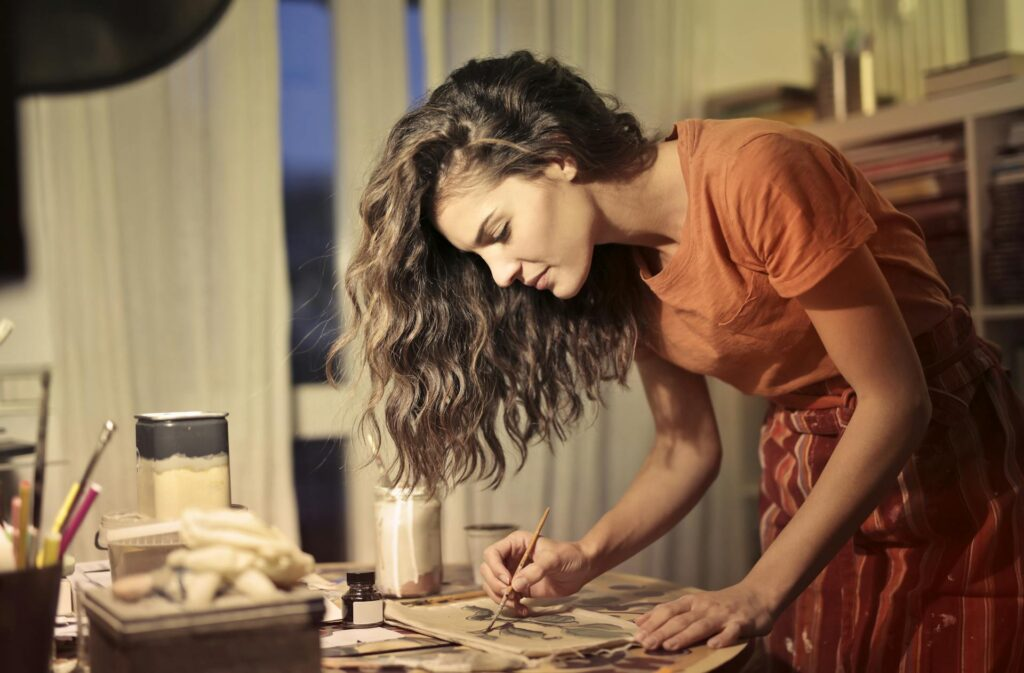

In [3]:
img

In [4]:
img_array = np.array(img)

In [5]:
img_array.shape

(673, 1024, 3)

In [6]:
os.path.getsize('pexels-andrea-piacquadio-3771079-1024x673.jpg')

93990

In [7]:
def central_cropping(img, cropped_h, cropped_w):
    img_height, img_width, img_channel = img.shape
    left = (img_width - cropped_w) // 2
    top = (img_height - cropped_h) // 2
    right = left + cropped_w
    bottom = top + cropped_h
    cropped_img = img[top:bottom, left:right]
    return cropped_img
    

In [8]:
cropped_img = central_cropping(img_array.copy(), 256, 256)

In [9]:
cropped_img.shape

(256, 256, 3)

In [10]:
original_img = cropped_img.copy()

In [11]:
img_pil = Image.fromarray(cropped_img)

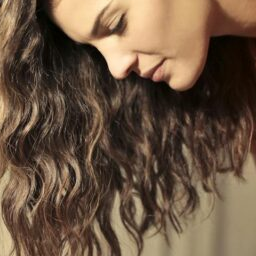

In [12]:
img_pil

In [13]:
from io import BytesIO

buffer = BytesIO()
img_pil.save(buffer, format='PNG')   # or 'JPEG'
size_in_bytes = buffer.getbuffer().nbytes

print(size_in_bytes)

97582


In [14]:
from io import BytesIO

buffer = BytesIO()
img.save(buffer, format='PNG')   # or 'JPEG'
size_in_bytes = buffer.getbuffer().nbytes

print(size_in_bytes)

721186


In [15]:
cropped_img_R = cropped_img[:, :, 0]
cropped_img_G = cropped_img[:, :, 1]
cropped_img_B = cropped_img[:, :, 2]

In [16]:
cropped_img_Y = 0.299 * cropped_img_R.copy() + 0.587 * cropped_img_G.copy() + 0.114 * cropped_img_B.copy()
cropped_img_Cb =  -0.168736 * cropped_img_R.copy() - 0.331264 * cropped_img_G.copy() + 0.5 * cropped_img_B.copy() + 128
cropped_img_Cr = 0.5 * cropped_img_R.copy() - 0.418688 * cropped_img_G.copy() - 0.081312 * cropped_img_B.copy() + 128

In [17]:
cropped_img_Y.shape

(256, 256)

In [18]:
cropped_img_R.shape

(256, 256)

In [19]:
cropped_img_Cr

array([[137.069184, 137.31312 , 138.12624 , ..., 157.171168, 157.171168,
        157.171168],
       [137.325248, 137.31312 , 138.12624 , ..., 157.171168, 158.089856,
        158.089856],
       [138.069184, 138.638368, 138.951488, ..., 157.171168, 158.089856,
        158.089856],
       ...,
       [142.171168, 140.915104, 140.915104, ..., 137.858048, 137.858048,
        137.858048],
       [142.171168, 140.915104, 140.915104, ..., 137.858048, 137.858048,
        137.858048],
       [142.333792, 142.333792, 142.333792, ..., 137.358048, 137.358048,
        137.858048]], shape=(256, 256))

In [20]:
blocked_imgY = np.zeros((32*32, 8, 8))

index = 0
for i in range(0, 256, 8):
    for j in range(0, 256, 8):
        blocked_imgY[index] = cropped_img_Y[i:i+8, j:j+8]
        index += 1

In [21]:
blocked_imgY

array([[[ 84.285,  94.943, 101.803, ..., 192.904, 198.844, 202.3  ],
        [ 97.926,  81.943,  99.803, ..., 191.377, 216.203, 164.012],
        [ 79.883,  68.085, 105.646, ..., 188.377, 218.203, 138.784],
        ...,
        [ 31.195,  79.636, 159.251, ..., 175.883, 118.111, 120.866],
        [ 45.864,  99.963, 183.094, ..., 140.883, 121.111, 133.866],
        [ 84.006, 126.105, 181.236, ..., 129.894, 124.111, 120.866]],

       [[121.995, 144.875, 120.217, ..., 102.767, 151.784, 115.784],
        [130.875, 151.858, 110.314, ..., 114.767, 142.556, 122.556],
        [136.234, 146.217,  89.086, ..., 126.767, 129.784, 124.556],
        ...,
        [125.077,  95.946,  89.989, ..., 164.767, 154.012, 132.784],
        [104.963,  95.718, 105.875, ..., 164.767, 146.012, 132.012],
        [ 91.735, 104.077, 119.234, ..., 165.767, 137.012, 133.012]],

       [[110.251, 116.006, 101.636, ..., 101.971, 113.302,  64.932],
        [111.251, 118.006, 100.636, ..., 109.259, 119.302,  62.22 ],
    

In [22]:
blocked_imgY.shape

(1024, 8, 8)

In [23]:
blocked_imgCb = np.zeros((32*32, 8, 8))

index = 0
for i in range(0, 256, 8):
    for j in range(0, 256, 8):
        blocked_imgCb[index] = cropped_img_Cb[i:i+8, j:j+8]
        index += 1

In [24]:
blocked_imgCr = np.zeros((32*32, 8, 8))

index = 0
for i in range(0, 256, 8):
    for j in range(0, 256, 8):
        blocked_imgCr[index] = cropped_img_Cr[i:i+8, j:j+8]
        index += 1

In [25]:
def complement_pixels(img):
        return img.astype(np.float32) - 128.0

In [26]:
blocked_imgYcomp = complement_pixels(blocked_imgY.copy()) 
blocked_imgCbcomp = complement_pixels(blocked_imgCb.copy()) 
blocked_imgCrcomp = complement_pixels(blocked_imgCr.copy()) 

In [27]:
blocked_imgCb

array([[[121.631488, 120.131488, 115.131488, ..., 103.787808,
         104.950336, 106.950336],
        [122.962752, 120.131488, 115.131488, ..., 102.956544,
         103.619072, 107.112864],
        [121.294016, 117.794016, 112.962752, ..., 102.956544,
         103.619072, 106.112864],
        ...,
        [113.7816  , 111.275392, 108.106656, ..., 102.106656,
         103.106656, 104.93792 ],
        [112.275392, 108.269184, 105.93792 , ..., 102.106656,
         103.106656, 104.93792 ],
        [109.93792 , 105.931712, 103.600448, ..., 102.100448,
         103.106656, 104.93792 ]],

       [[109.944128, 112.269184, 113.769184, ..., 108.944128,
         106.112864, 106.112864],
        [112.269184, 115.100448, 117.100448, ..., 108.944128,
         105.112864, 105.112864],
        [110.93792 , 113.769184, 116.100448, ..., 108.944128,
         106.112864, 105.112864],
        ...,
        [108.769184, 111.100448, 112.769184, ..., 108.944128,
         107.112864, 106.112864],
        [108

In [28]:
blocked_imgYcomp[0]

array([[-43.714996 , -33.057    , -26.196999 ,  10.891006 ,  13.761993 ,
         64.90401  ,  70.843994 ,  74.3      ],
       [-30.073997 , -46.057    , -28.196999 ,  10.662994 ,  40.121002 ,
         63.377    ,  88.203    ,  36.011993 ],
       [-48.116997 , -59.915    , -22.353996 ,  34.033005 ,  53.893005 ,
         60.377    ,  90.203    ,  10.783997 ],
       [-77.274    , -60.658997 , -15.157997 ,  63.990005 ,  53.904007 ,
         68.86099  ,  53.800995 ,  -5.205002 ],
       [-88.719    , -54.805    ,  -1.3040009,  67.07201  ,  60.800995 ,
         74.171005 ,   7.8119965, -19.905998 ],
       [-96.805    , -48.364    ,  31.251007 ,  55.154007 ,  67.171005 ,
         47.882996 ,  -9.889    ,  -7.1340027],
       [-82.136    , -28.037003 ,  55.093994 ,  49.638    ,  60.882996 ,
         12.882996 ,  -6.889    ,   5.8659973],
       [-43.994003 ,  -1.8949966,  53.235992 ,  50.121994 ,  52.893997 ,
          1.8939972,  -3.889    ,  -7.1340027]], dtype=float32)

In [29]:
blocked_imgYcomp

array([[[-43.714996  , -33.057     , -26.196999  , ...,  64.90401   ,
          70.843994  ,  74.3       ],
        [-30.073997  , -46.057     , -28.196999  , ...,  63.377     ,
          88.203     ,  36.011993  ],
        [-48.116997  , -59.915     , -22.353996  , ...,  60.377     ,
          90.203     ,  10.783997  ],
        ...,
        [-96.805     , -48.364     ,  31.251007  , ...,  47.882996  ,
          -9.889     ,  -7.1340027 ],
        [-82.136     , -28.037003  ,  55.093994  , ...,  12.882996  ,
          -6.889     ,   5.8659973 ],
        [-43.994003  ,  -1.8949966 ,  53.235992  , ...,   1.8939972 ,
          -3.889     ,  -7.1340027 ]],

       [[ -6.0049973 ,  16.875     ,  -7.782997  , ..., -25.233002  ,
          23.783997  , -12.216003  ],
        [  2.875     ,  23.858002  , -17.685997  , ..., -13.233002  ,
          14.556     ,  -5.4440002 ],
        [  8.233994  ,  18.216995  , -38.914     , ...,  -1.2330017 ,
           1.7839966 ,  -3.4440002 ],
        ...,


In [30]:
def forward_dct_2d(block):
    block = np.array(block, dtype=float)      # convert list → array
    dct_block = dct(dct(block.T, axis=0, norm='ortho').T, axis=0, norm='ortho')
    return dct_block


In [31]:
def calculate_dct_img(img):
    h, w, c = img.shape
    res = np.zeros_like(img, dtype=float)
    for i in range(h):
        res[i] = forward_dct_2d(img[i])
    return res

In [32]:
blocked_imgYdct = calculate_dct_img(blocked_imgYcomp.copy())
blocked_imgCbdct = calculate_dct_img(blocked_imgCbcomp.copy())
blocked_imgCrdct = calculate_dct_img(blocked_imgCrcomp.copy())

In [33]:
blocked_imgYdct

array([[[ 8.99836245e+01, -2.31631896e+02, -2.23493842e+02, ...,
          2.81472380e+01, -9.60509343e-02,  1.25483353e-01],
        [ 2.42004675e+01, -1.08252840e+02,  1.00478030e+02, ...,
          4.19462651e+01, -2.16446731e+01, -2.02029135e+01],
        [ 2.01650502e+01,  3.02542542e+01,  8.44754545e+01, ...,
         -2.08295838e+01,  2.50852696e-01,  2.06405391e+01],
        ...,
        [-3.71971024e-01, -1.27701304e+01, -1.08757113e-01, ...,
         -4.89044824e-02, -9.16316128e-02,  5.87264066e-01],
        [ 9.07033728e-02, -5.21641179e-01, -7.39020187e-02, ...,
          3.54855918e-01, -1.44445259e-02,  2.37585472e-01],
        [-2.37037662e-01,  2.16767217e-01,  2.41944897e-01, ...,
          2.13626038e-02,  1.73053129e-02,  4.09420576e-02]],

       [[-4.31026335e+01, -6.70938969e+01,  4.44315130e+01, ...,
          4.84682628e-01, -1.80763062e+01, -2.18839469e+01],
        [-1.26901757e+01,  6.80761110e+01,  4.94224970e+01, ...,
          1.85602753e-01, -4.38276119e

In [34]:
def quantization(img, quantType):
    h, w, c = img.shape
    if quantType == 'Y':
        quant_matrix = [
                            # [ 8,  6,  6,  8, 12, 20, 26, 31],
                            # [ 6,  6,  7, 10, 13, 29, 30, 28],
                            # [ 7,  7,  8, 12, 20, 29, 35, 28],
                            # [ 7,  9, 11, 15, 26, 44, 40, 31],
                            # [ 9, 11, 19, 28, 34, 55, 52, 39],
                            # [12, 18, 28, 32, 41, 52, 57, 46],
                            # [25, 32, 39, 44, 52, 61, 60, 50],
                            # [36, 46, 48, 49, 56, 50, 52, 50]
                            [16,11,10,16,24,40,51,61],
                            [12,12,14,19,26,58,60,55],
                            [14,13,16,24,40,57,69,56],
                            [14,17,22,29,51,87,80,62],
                            [18,22,37,56,68,109,103,77],
                            [24,35,55,64,81,104,113,92],
                            [49,64,78,87,103,121,120,101],
                            [72,92,95,98,112,100,103,99]
                        ]
    else:
        quant_matrix = [
                            # [ 9,  9, 12, 24, 50, 50, 50, 50],
                            # [ 9, 11, 13, 33, 50, 50, 50, 50],
                            # [12, 13, 28, 50, 50, 50, 50, 50],
                            # [24, 33, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50]
                            [17,18,24,47,99,99,99,99],
                            [18,21,26,66,99,99,99,99],
                            [24,26,56,99,99,99,99,99],
                            [47,66,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99]
                      ]
    for i in range(h):
        img[i] = img[i] / quant_matrix
    return img

In [35]:
blocked_imgYquant = quantization(blocked_imgYdct.copy(), 'Y')
blocked_imgCbquant = quantization(blocked_imgCbdct.copy(), 'Cb')
blocked_imgCrquant = quantization(blocked_imgCrdct.copy(), 'Cr')

In [36]:
blocked_imgYquant

array([[[ 5.62397653e+00, -2.10574451e+01, -2.23493842e+01, ...,
          7.03680950e-01, -1.88335165e-03,  2.05710415e-03],
        [ 2.01670563e+00, -9.02107001e+00,  7.17700216e+00, ...,
          7.23211467e-01, -3.60744552e-01, -3.67325700e-01],
        [ 1.44036073e+00,  2.32725032e+00,  5.27971591e+00, ...,
         -3.65431294e-01,  3.63554632e-03,  3.68581055e-01],
        ...,
        [-1.54987927e-02, -3.64860868e-01, -1.97740206e-03, ...,
         -4.70235408e-04, -8.10899228e-04,  6.38330506e-03],
        [ 1.85108924e-03, -8.15064342e-03, -9.47461779e-04, ...,
          2.93269354e-03, -1.20371049e-04,  2.35233140e-03],
        [-3.29218975e-03,  2.35616541e-03,  2.54678839e-03, ...,
          2.13626038e-04,  1.68012746e-04,  4.13556137e-04]],

       [[-2.69391459e+00, -6.09944517e+00,  4.44315130e+00, ...,
          1.21170657e-02, -3.54437377e-01, -3.58753227e-01],
        [-1.05751464e+00,  5.67300925e+00,  3.53017836e+00, ...,
          3.20004746e-03, -7.30460198e

In [37]:
non_zero_count = np.count_nonzero(blocked_imgCbquant)
print(non_zero_count)

61302


In [38]:
import numpy as np
import heapq
from collections import Counter

# Standard JPEG zigzag order for 8x8 blocks
ZIGZAG_INDICES = [
    (0,0),
    (0,1),(1,0),
    (2,0),(1,1),(0,2),
    (0,3),(1,2),(2,1),(3,0),
    (4,0),(3,1),(2,2),(1,3),(0,4),
    (0,5),(1,4),(2,3),(3,2),(4,1),(5,0),
    (6,0),(5,1),(4,2),(3,3),(2,4),(1,5),(0,6),
    (0,7),(1,6),(2,5),(3,4),(4,3),(5,2),(6,1),(7,0),
    (7,1),(6,2),(5,3),(4,4),(3,5),(2,6),(1,7),
    (2,7),(3,6),(4,5),(5,4),(6,3),(7,2),
    (7,3),(6,4),(5,5),(4,6),(3,7),
    (4,7),(5,6),(6,5),(7,4),
    (7,5),(6,6),(5,7),
    (6,7),(7,6),
    (7,7)
]

def zigzag(block: np.ndarray) -> np.ndarray:
    block = np.asarray(block)
    assert block.shape == (8, 8)
    return np.array([block[i, j] for (i, j) in ZIGZAG_INDICES], dtype=block.dtype)

def inverse_zigzag(vec: np.ndarray) -> np.ndarray:
    vec = np.asarray(vec)
    assert vec.size == 64
    block = np.zeros((8, 8), dtype=vec.dtype)
    for idx, (i, j) in enumerate(ZIGZAG_INDICES):
        block[i, j] = vec[idx]
    return block


In [39]:
def rle_encode_block(coeffs: np.ndarray):
    """
    coeffs: (64,) quantized coefficients in zigzag order.
    Returns list of symbols:
      ('DC', dc_val)
      ('AC', run, val)
      ('ZRL', 15, 0)
      ('EOB', 0, 0)  # always at end
    """
    coeffs = np.asarray(coeffs).astype(int).tolist()
    assert len(coeffs) == 64

    symbols = []

    # DC
    symbols.append(('DC', coeffs[0]))

    zero_run = 0
    for v in coeffs[1:]:
        v = int(v)
        if v == 0:
            zero_run += 1
        else:
            # output ZRL for each 16 zeros
            while zero_run >= 16:
                symbols.append(('ZRL', 15, 0))
                zero_run -= 16
            symbols.append(('AC', zero_run, v))
            zero_run = 0

    # Always terminate block explicitly
    symbols.append(('EOB', 0, 0))

    return symbols

def rle_decode_block(symbols):
    """
    symbols: list of ('DC', val) / ('AC', run, val) / ('ZRL', 15, 0) / ('EOB', 0, 0)
    Returns: (64,) coefficients.
    """
    coeffs = []

    it = iter(symbols)
    first = next(it)
    assert first[0] == 'DC'
    coeffs.append(int(first[1]))

    for sym in it:
        kind = sym[0]
        if kind == 'AC':
            run, val = sym[1], sym[2]
            coeffs.extend([0] * int(run))
            coeffs.append(int(val))
        elif kind == 'ZRL':
            run = sym[1]  # usually 15
            coeffs.extend([0] * int(run))
        elif kind == 'EOB':
            break
        else:
            raise ValueError(f"Unknown RLE symbol kind: {sym}")

    # pad to 64
    if len(coeffs) < 64:
        coeffs.extend([0] * (64 - len(coeffs)))

    return np.array(coeffs, dtype=np.int32)


In [40]:
class HuffmanNode:
    def __init__(self, freq, symbol=None, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq


In [41]:
def build_huffman_code(symbols):
    """
    symbols: list of hashable items (our RLE tuples)
    returns: {symbol -> bitstring}
    """
    freq = Counter(symbols)
    heap = [HuffmanNode(f, symbol=s) for s, f in freq.items()]
    if not heap:
        return {}
    heapq.heapify(heap)

    if len(heap) == 1:
        # only one symbol
        return {heap[0].symbol: '0'}

    while len(heap) > 1:
        n1 = heapq.heappop(heap)
        n2 = heapq.heappop(heap)
        merged = HuffmanNode(n1.freq + n2.freq, left=n1, right=n2)
        heapq.heappush(heap, merged)

    root = heap[0]
    codebook = {}

    def dfs(node, prefix):
        if node.symbol is not None:
            codebook[node.symbol] = prefix or '0'
        else:
            dfs(node.left, prefix + '0')
            dfs(node.right, prefix + '1')

    dfs(root, '')
    return codebook


In [42]:
def huffman_encode(symbols, codebook):
    """
    symbols: list of RLE symbols
    returns: bitstring '010101...'
    """
    return ''.join(codebook[s] for s in symbols)

def _build_decoding_trie(codebook):
    root = {}
    for sym, bits in codebook.items():
        node = root
        for b in bits:
            node = node.setdefault(b, {})
        node['sym'] = sym
    return root

def huffman_decode(bitstream, codebook):
    """
    bitstream: '010101...'
    returns: list of RLE symbols
    """
    root = _build_decoding_trie(codebook)
    out = []
    node = root
    for b in bitstream:
        node = node[b]
        if 'sym' in node:
            out.append(node['sym'])
            node = root
    return out


In [43]:
def encode_channel(blocks_quant: np.ndarray):
    """
    blocks_quant: (num_blocks, 8, 8) quantized coefficients
    returns: bitstream (str), codebook (dict), num_blocks (int)
    """
    all_symbols = []
    for block in blocks_quant:
        zz = zigzag(block)
        syms = rle_encode_block(zz)
        all_symbols.extend(syms)

    codebook = build_huffman_code(all_symbols)
    bitstream = huffman_encode(all_symbols, codebook)
    return bitstream, codebook, blocks_quant.shape[0]

def decode_channel(bitstream: str, codebook, num_blocks: int):
    """
    bitstream, codebook from encode_channel
    returns: (num_blocks, 8, 8) quantized coefficients (same as input to encode_channel)
    """
    syms = huffman_decode(bitstream, codebook)

    blocks = []
    current = []
    blocks_done = 0

    for sym in syms:
        current.append(sym)
        if sym[0] == 'EOB':
            coeffs = rle_decode_block(current)
            block = inverse_zigzag(coeffs)
            blocks.append(block)
            current = []
            blocks_done += 1
            if blocks_done == num_blocks:
                break

    return np.stack(blocks, axis=0)


In [44]:
y_bits, y_codebook, y_nblocks = encode_channel(blocked_imgYquant.copy())
blocked_imgYquant_after = decode_channel(y_bits, y_codebook, y_nblocks)

In [45]:
cb_bits, cb_codebook, cb_nblocks = encode_channel(blocked_imgCbquant.copy())
blocked_imgCbquant_after = decode_channel(cb_bits, cb_codebook, cb_nblocks)

In [46]:
cr_bits, cr_codebook, cr_nblocks = encode_channel(blocked_imgCrquant.copy())
blocked_imgCrquant_after = decode_channel(cr_bits, cr_codebook, cr_nblocks)

In [47]:
def re_quantization(img, quantType):
    h, w, c = img.shape
    if quantType == 'Y':
        quant_matrix = [
                            # [ 8,  6,  6,  8, 12, 20, 26, 31],
                            # [ 6,  6,  7, 10, 13, 29, 30, 28],
                            # [ 7,  7,  8, 12, 20, 29, 35, 28],
                            # [ 7,  9, 11, 15, 26, 44, 40, 31],
                            # [ 9, 11, 19, 28, 34, 55, 52, 39],
                            # [12, 18, 28, 32, 41, 52, 57, 46],
                            # [25, 32, 39, 44, 52, 61, 60, 50],
                            # [36, 46, 48, 49, 56, 50, 52, 50]
                            [16,11,10,16,24,40,51,61],
                            [12,12,14,19,26,58,60,55],
                            [14,13,16,24,40,57,69,56],
                            [14,17,22,29,51,87,80,62],
                            [18,22,37,56,68,109,103,77],
                            [24,35,55,64,81,104,113,92],
                            [49,64,78,87,103,121,120,101],
                            [72,92,95,98,112,100,103,99]
                        ]
    else:
        quant_matrix = [
                            # [ 9,  9, 12, 24, 50, 50, 50, 50],
                            # [ 9, 11, 13, 33, 50, 50, 50, 50],
                            # [12, 13, 28, 50, 50, 50, 50, 50],
                            # [24, 33, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50],
                            # [50, 50, 50, 50, 50, 50, 50, 50]
                            [17,18,24,47,99,99,99,99],
                            [18,21,26,66,99,99,99,99],
                            [24,26,56,99,99,99,99,99],
                            [47,66,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99],
                            [99,99,99,99,99,99,99,99]
                      ]
    for i in range(h):
        img[i] = img[i].astype(np.float32) * quant_matrix
    return img

In [48]:
blocked_imgYde_quant = re_quantization(blocked_imgYquant_after.copy(), 'Y')
blocked_imgCbde_quant = re_quantization(blocked_imgCbquant_after.copy(), 'Cb')
blocked_imgCrde_quant = re_quantization(blocked_imgCrquant_after.copy(), 'Cr')

In [49]:
def inverse_dct_2d(dct_block):
    dct_block = np.array(dct_block, dtype=float)
    block = idct(idct(dct_block.T, axis=0, norm='ortho').T,
                 axis=0, norm='ortho')
    return block

In [50]:
def calculate_idct_img(dct_img):
    h, w, c = dct_img.shape
    res = np.zeros_like(dct_img, dtype=float)

    for i in range(h):
        res[i] = inverse_dct_2d(dct_img[i])

    return res

In [51]:
blocked_imgYidct = calculate_idct_img(blocked_imgYde_quant.copy())
blocked_imgCbidct = calculate_idct_img(blocked_imgCbde_quant.copy())
blocked_imgCridct = calculate_idct_img(blocked_imgCrde_quant.copy())

In [52]:
blocked_imgCridct

array([[[11.75416035, 11.75416035, 11.75416035, ..., 11.75416035,
         11.75416035, 11.75416035],
        [12.22927989, 12.22927989, 12.22927989, ..., 12.22927989,
         12.22927989, 12.22927989],
        [13.10718634, 13.10718634, 13.10718634, ..., 13.10718634,
         13.10718634, 13.10718634],
        ...,
        [16.64281366, 16.64281366, 16.64281366, ..., 16.64281366,
         16.64281366, 16.64281366],
        [17.52072011, 17.52072011, 17.52072011, ..., 17.52072011,
         17.52072011, 17.52072011],
        [17.99583965, 17.99583965, 17.99583965, ..., 17.99583965,
         17.99583965, 17.99583965]],

       [[14.875     , 14.875     , 14.875     , ..., 14.875     ,
         14.875     , 14.875     ],
        [14.875     , 14.875     , 14.875     , ..., 14.875     ,
         14.875     , 14.875     ],
        [14.875     , 14.875     , 14.875     , ..., 14.875     ,
         14.875     , 14.875     ],
        ...,
        [14.875     , 14.875     , 14.875     , ..., 1

In [53]:
def scale_ahead(img):
    return img.astype(np.float32) + 128.0

In [54]:
blocked_imgYscale_ahead = scale_ahead(blocked_imgYidct.copy())
blocked_imgCbscale_ahead = scale_ahead(blocked_imgCbidct.copy())
blocked_imgCrscale_ahead = scale_ahead(blocked_imgCridct.copy())

In [55]:
blocked_imgYidct[0][0][0] - blocked_imgYscale_ahead[0][0][0]

np.float64(-127.99999967548196)

In [56]:
def blocks_to_image(blocks, img_h=256, img_w=256, block_size=8):
    img = np.zeros((img_h, img_w), dtype=np.float32)
    idx = 0
    blocks_per_row = img_w // block_size

    for i in range(0, img_h, block_size):
        for j in range(0, img_w, block_size):
            img[i:i+block_size, j:j+block_size] = blocks[idx]
            idx += 1

    return img


In [57]:
unblocked_imgY = blocks_to_image(blocked_imgYscale_ahead.copy())
unblocked_imgCb = blocks_to_image(blocked_imgCbscale_ahead.copy())
unblocked_imgCr = blocks_to_image(blocked_imgCrscale_ahead.copy())

In [58]:
unblocked_imgY.shape

(256, 256)

In [59]:
Y  = unblocked_imgY.copy()
Cb = unblocked_imgCb.copy()
Cr = unblocked_imgCr.copy()

unblocked_imgR = Y + 1.402 * (Cr - 128)
unblocked_imgG = Y - 0.344136 * (Cb - 128) - 0.714136 * (Cr - 128)
unblocked_imgB = Y + 1.772 * (Cb - 128)

In [60]:
rgb_img = np.stack([
    np.clip(unblocked_imgR, 0, 255),
    np.clip(unblocked_imgG, 0, 255),
    np.clip(unblocked_imgB, 0, 255)
], axis=-1).astype(np.uint8)

In [61]:
jpeg_compressed = Image.fromarray(rgb_img)

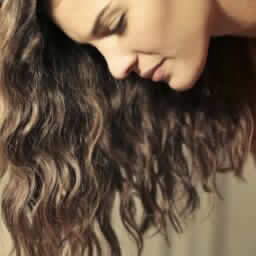

In [62]:
jpeg_compressed

In [63]:
print(cropped_img.shape, cropped_img.dtype)
raw_bytes = cropped_img.nbytes
raw_kb = raw_bytes / 1024
print("Original (raw) size:", raw_bytes, "bytes  (~", raw_kb, "KB)")


(256, 256, 3) uint8
Original (raw) size: 196608 bytes  (~ 192.0 KB)


In [64]:
total_bits = len(y_bits) + len(cb_bits) + len(cr_bits)
compressed_bytes = (total_bits + 7) // 8   # round up to full bytes
compressed_kb = compressed_bytes / 1024

print("Compressed size (bitstream only):", compressed_bytes, "bytes  (~", compressed_kb, "KB)")


Compressed size (bitstream only): 7772 bytes  (~ 7.58984375 KB)


In [65]:
(raw_kb - compressed_kb) / raw_kb * 100

96.04695638020834

In [66]:
compressed_kb / raw_kb * 100

3.9530436197916665